""

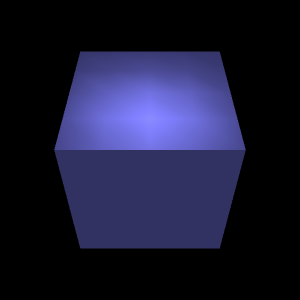

qvel= [1.9975128]


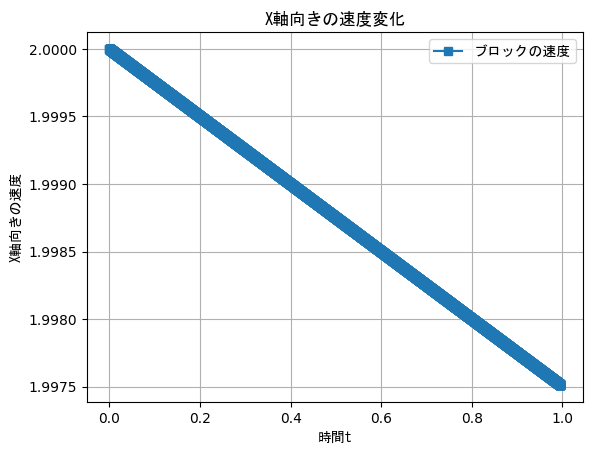

In [1]:
import numpy as np
import mujoco
import mediapy as media
import matplotlib.pyplot as plt


xml = """
<mujoco>
    <compiler angle="degree" coordinate="local" inertiafromgeom="true" />
    <option integrator="RK4" timestep="0.0001" />
    <worldbody>
         <light pos="0 -0.5 3"/>
            <body name="boxx" pos="0 0 0">
                <geom type="box" size="1 1 1" rgba=".5 .5 1 1" />
                <joint name='slider' type='slide' pos='0 0 0' axis='1 0 0' damping="1"/>
            </body>
    </worldbody>
</mujoco>
"""
cube1_zvel = []
cube2_zvel = []
cube2_greenball_zvel = []
times = []
frames = []
model = mujoco.MjModel.from_xml_string(xml)
renderer = mujoco.Renderer(model, 300, 300)
data = mujoco.MjData(model)
mujoco.mj_forward(model, data)
renderer.update_scene(data, "fixed")
media.show_image(renderer.render())
data.qvel = [2]
# simulate and render
for i in range(220):
  while data.time < i/220.0: #1/4x real time　１２０ステップ進めてから，こまどりを保存する仕組み？
    mujoco.mj_step(model, data)
    times.append(data.time) #時間の値をリストに格納
    cube1_zvel.append(data.qvel[0].copy())
    # cube2_zvel.append(data.qvel[8].copy())
    # cube2_greenball_zvel.append(data.[11].copy())
    # print(angular_velocity[2,2])
  renderer.update_scene(data,)
  frame = renderer.render()
  frames.append(frame)

# print(angular_velocity[2][2])
# show video
media.show_video(frames, fps=60)

print("qvel=", data.qvel)

plt.xlabel("時間t", fontname="MS Gothic")
plt.ylabel("X軸向きの速度", fontname="MS Gothic")
plt.grid()
plt.title("X軸向きの速度変化", fontname="MS Gothic")
plt.plot(times, cube1_zvel, linestyle='solid', marker='s', label="ブロックの速度")
# plt.plot(times, cube2_zvel, linestyle='solid', marker='p', label="上のブロックのZ軸向き速度")
# plt.plot(times, cube2_greenball_zvel, linestyle='solid', marker='h', label="上のブロックについた緑玉のZ軸向き速度(相対?)")
# plt.plot(times, angular_velocity[2][2], linestyle='solid', marker='o')
plt.legend(prop={'family':'MS Gothic'})
plt.show()

In [10]:
import mujoco
# dir(model)
model.body_pos = [[1,0,0],[0,0,0]]
print(data.qvel)
# print(model.body_pos)

[0.]
